# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!gdown 18QuoyuqmNKmR9mba5he4ojPc4KzkIs3t

Downloading...
From: https://drive.google.com/uc?id=18QuoyuqmNKmR9mba5he4ojPc4KzkIs3t
To: /content/train-cars24-car-price.csv
100% 1.25M/1.25M [00:00<00:00, 30.7MB/s]


In [3]:
df = pd.read_csv('train-cars24-car-price.csv')
df.head(15)

,full_name,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti SX4 Zxi BSIII,2.85,2007.0,Individual,110000,Petrol,Manual,15.00,1586.0,104.68,5.0
1,Hyundai i20 Sportz 1.4 CRDi,4.70,2012.0,Dealer,70000,Diesel,Manual,21.90,1396.0,88.76,5.0
2,Maruti Swift VDI BSIV,5.25,2015.0,Individual,70000,Diesel,Manual,25.20,1248.0,74.00,5.0
3,Honda City 1.3 EXI,1.25,2005.0,Individual,90000,Petrol,Manual,13.00,1343.0,90.00,5.0
4,Volkswagen Polo 1.2 MPI Comfortline,4.65,2015.0,Dealer,41000,Petrol,Manual,16.47,1198.0,74.00,5.0
5,Toyota Innova 2.5 GX 8 STR BSIV,7.25,2012.0,Individual,255000,Diesel,Manual,12.80,2494.0,102.00,8.0
6,Hyundai i20 1.2 Asta Option,6.50,2017.0,Individual,25000,Petrol,Manual,18.60,1197.0,81.83,5.0
7,Volkswagen Vento 1.6 Highline,4.89,2015.0,Individual,43000,Petrol,Manual,15.04,1598.0,103.20,5.0
8,Toyota Camry Hybrid 2.5,21.00,2016.0,Dealer,75000,Petrol,Automatic,19.16,2487.0,214.50,5.0
9,Audi Q3 2.0 TDI,11.00,2013.0,Individual,103142,Diesel,Automatic,15.73,1968.0,174.33,5.0


In [4]:
df.shape   #no. of rows and columns in the dataframe

(13986, 11)

In [5]:
df.info()   #checking the data-types of each variable in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13986 entries, 0 to 13985
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   full_name          13986 non-null  object 
 1   selling_price      13986 non-null  float64
 2   year               13986 non-null  float64
 3   seller_type        13986 non-null  object 
 4   km_driven          13986 non-null  int64  
 5   fuel_type          13986 non-null  object 
 6   transmission_type  13986 non-null  object 
 7   mileage            13986 non-null  float64
 8   engine             13986 non-null  float64
 9   max_power          13986 non-null  float64
 10  seats              13986 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.2+ MB


As seen above, there are no null values. So we can move forward and view the descriptive statistic of the data

In [6]:
df.describe()   #statistics of the data

,selling_price,year,km_driven,mileage,engine,max_power,seats
count,13986.000000,13986.000000,1.398600e+04,13986.000000,13986.000000,13986.000000,13986.000000
mean,7.377749,2014.516088,5.797629e+04,19.356221,1473.574905,97.685631,5.313242
std,9.368596,3.256795,5.378180e+04,4.638576,518.289204,45.067944,0.831653
min,0.325000,1991.000000,1.000000e+02,0.000000,0.000000,5.000000,2.000000
25%,3.400000,2013.000000,3.100000e+04,16.840000,1197.000000,73.900000,5.000000
50%,5.100000,2015.000000,5.120000e+04,19.160000,1248.000000,86.700000,5.000000
75%,7.800000,2017.000000,7.397800e+04,22.320000,1582.000000,112.000000,5.000000
max,395.000000,2021.000000,3.800000e+06,120.000000,6752.000000,626.000000,14.000000




*   Selling price ranges from [0.325-395]; values likely to be in lakhs.
*   minimum milage is 0 and maximum 120. Need to check for outliers.
*   engine (likely in cc) minimum is 0 and maximum 6752. Need to check for outliers.



# Distributions

Checking the distributions of the given features individually, by plotting histograms.

<Axes: >

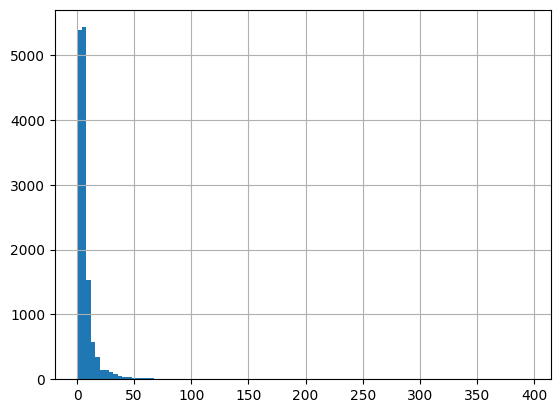

In [7]:
df['selling_price'].hist(bins=100)

We can see from the selling price histogram -


*   Most cars' selling prices are concentrated between 0 - 50 lakhs.
*   As we see the maximum selling price is 3.95 Cr, there must be cars ranged between 50 lakhs till 3.95 Cr, even if not as much as ranging between 0 - 50 lakhs.
*   This data has a high variability, i.e. the data is spread over a significant range instead of being concentrated to a less varied range.

We have to check the percentage of outliers. We can consider manually cars above 1 cr to be outliers.



In [8]:
df[df['selling_price']>=100]   #getting data of cars priced greater than 1 cr

,full_name,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats
670,Mercedes-Benz S-Class S 450,110.0,2019.0,Dealer,18000,Petrol,Automatic,7.81,2996.0,362.07,5.0
1125,Bentley Mulsanne 6.8,235.0,2012.0,Dealer,15000,Petrol,Automatic,10.10,6752.0,505.00,5.0
3174,Mercedes-Benz S-Class S 500,110.0,2016.0,Dealer,41000,Petrol,Automatic,7.81,5461.0,362.90,5.0
3968,Lamborghini Gallardo Spyder,150.0,2013.0,Dealer,4000,Petrol,Automatic,6.40,5204.0,560.00,2.0
4940,Ferrari GTC4Lusso T,395.0,2019.0,Dealer,3800,Petrol,Automatic,4.00,3855.0,601.00,4.0
5348,Jaguar XJ 50 Special Edition,110.0,2019.0,Individual,5400,Diesel,Automatic,14.47,2993.0,301.73,5.0
5450,Rolls-Royce Ghost Series II Extended Wheelbase,242.0,2017.0,Individual,5000,Petrol,Automatic,10.20,6592.0,563.00,4.0
11110,Porsche Cayenne GTS,111.0,2017.0,Dealer,24000,Petrol,Automatic,12.50,3604.0,440.00,5.0
13595,Bentley Continental GT Speed Convertible BSIV,145.0,2012.0,Dealer,9000,Petrol,Automatic,9.50,5998.0,626.00,4.0


In [9]:
df[df['selling_price']>=100].shape

(9, 11)

We see that only 9 out of 13986 cars are priced over 1cr.

Now, checking the percentage of cars over 1cr.

In [10]:
(df.loc[df.selling_price>=100].shape[0]/df.shape[0])*100
#shape[0] means accessing the first element in the shape, i.e. total rows
#df.shape = (13986,11) => df.shape[0] = 13986
#df.selling_price>=100].shape[0] gives the no. of cars priced over 1cr

0.06435006435006435

Only 0.06 percent of cars priced over 1cr. So to make analysis simpler, we'll saturate selling price of those cars at 100, i.e. assume that their selling price equals 1cr, to put them in the same bin.

In [11]:
df.loc[df.selling_price > 100, 'selling_price'] = 100

Similarly, plotting histogram for mileage.

<Axes: >

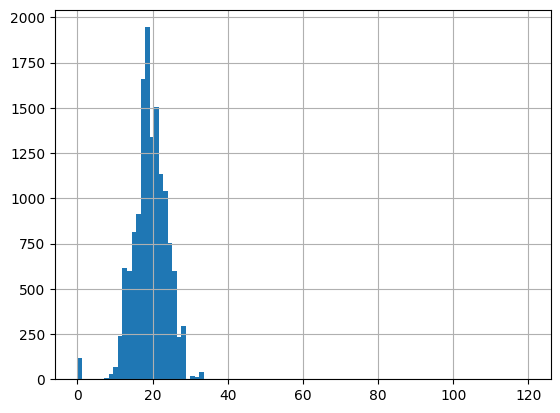

In [12]:
df['mileage'].hist(bins=100)

Also, plotting the **KDE plot**, i.e. **'Kernel Density Estimation Plot'** of mileage, similar to a histogram, but with a smoother curve, depting density of data in the plot.

<Axes: ylabel='Density'>

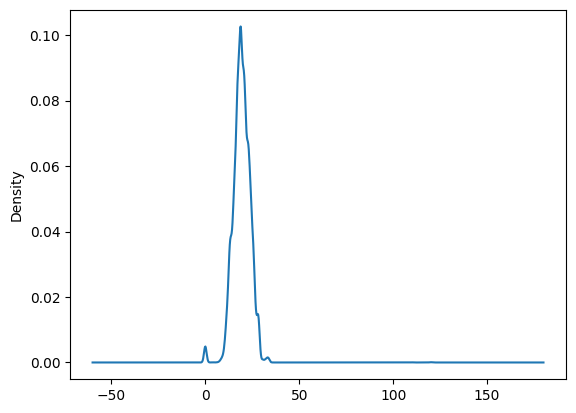

In [13]:
df['mileage'].plot.density()

From the above plots, we can infer -

*   mileage density is concentrated more between about 10 to around 30 or 40. (30 -35 considering histogram)
*   Over 40, mileage count seems to be very low, and can be considered as outliers. (Especially as we know maximum mileage is 120; might be an EV)
*   An unusual spike seen around 0, which should be taken into account. Also as we infered from the stats of the data that minimum mileage is 0, which isn't possible technically.



In [14]:
df[df['mileage']<=5].mileage.describe()

,mileage
count,119.000000
mean,0.033613
std,0.366679
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,4.000000


In [15]:
df[df['mileage']<=5].mileage.value_counts()

,count
mileage,
0.0,118
4.0,1


It shows min mileage=0 and no. of cars with 0 mileage=118

 which isn't technically possible.
Lets check the number of cars with their percentage having mileage equal to 0.

In [16]:
df[df['mileage']==0.0].shape   #118 cars with mileage=0

(118, 11)

In [17]:
(df.loc[df.mileage==0.0].shape[0]/df.shape[0])*100   #0.8% cars with 0 mileage

0.8437008437008438

This is a very small number of cars. We can safely impute or drop these points later during pre-processing.

We also see the cars with mileage over 30 or 40. Let's check them.

In [18]:
df[df['mileage']>35].mileage.value_counts()
#count of cars with mileage larger than 35

,count
mileage,
120.0,2
110.0,1


In [19]:
df[df['mileage']>35].fuel_type.value_counts()
#fuel type of cars with mileage over 35

,count
fuel_type,
Electric,3


We infer that cars giving mileage over 35, aka 110 and 120, are electric vehicles, which is not a wrong data, since EVs have range over 100 in a single charge.

Similarly, we can plot a histogram for engine cc.

<Axes: >

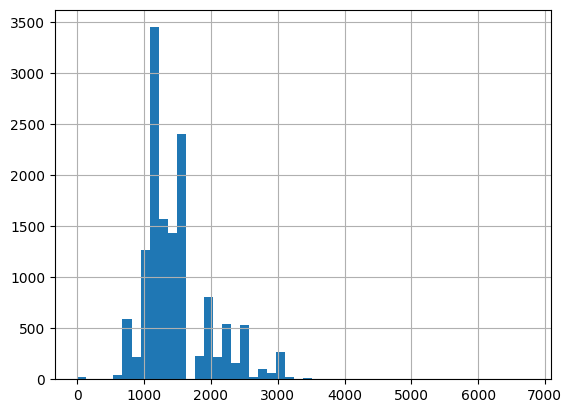

In [20]:
df['engine'].hist(bins=50)

<Axes: ylabel='Density'>

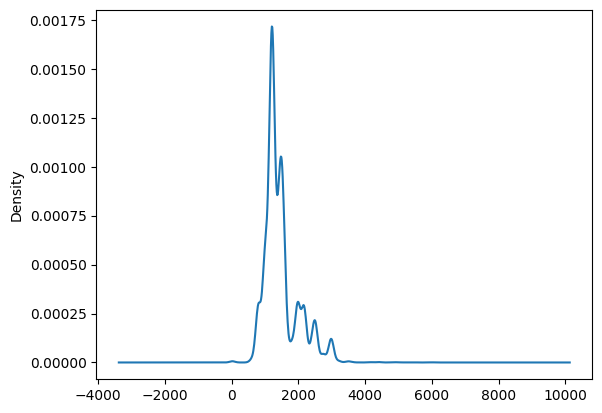

In [21]:
df['engine'].plot.density()

In [22]:
df[df['engine']>4000].engine.describe()

,engine
count,22.000000
mean,4954.500000
std,789.225645
min,4134.000000
25%,4395.000000
50%,4806.000000
75%,5396.750000
max,6752.000000


We have a small spike at 0 which also isn't technically possible. We have to take that into account too as we took for mileage.



*   We see a right skew, with density (tho less) of engine cc over 4000.
*   We have seen in the stats that max engine cc of 6752, which are common in super cars or luxury cars (cars above 1cr that we looked into before)



In [23]:
df[df['engine']<5]   #only 3 cars with engine cc = 0.0

,full_name,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats
3234,Tata Nexon EV XM,13.99,2021.0,Individual,5000,Electric,Automatic,0.0,0.0,127.0,5.0
4291,Mahindra e2o Premium,3.25,2013.0,Individual,50000,Electric,Automatic,120.0,0.0,25.5,5.0
4751,Mahindra e2o T2,3.60,2015.0,Dealer,42862,Electric,Automatic,120.0,0.0,25.5,5.0


Only three cars with 0 engine cc. But those 3 cars are electric, which turns the table.

**(exception) only Tata Nexon EV has both mileage 0 and engine 0.**

 Now the question arrises that if we consider the data in the variable **engine** refers to the engine displacement in cubic centimeters(cc), then we should also know the fact that engine displacement in cc is only considered for Internal combustion engines(petrol/deisel cars) and not EVs.

 EV power is generally measured in kilowatts(kW).

 Let's check whether other EVs in the dataframe have values in the engine section.

In [24]:
df[df['fuel_type']=='Electric'].engine.value_counts()

,count
engine,
0.000000,3
2494.000000,3
72.000000,3
1476.327401,2


Here we clearly see that while 3 EVs have 0 for engine, while the other 8 EVs have recorded engine datas.

So we have to conclude that -


*   If the engine variable data is in fact the engine displacement in cc, then how come the remaining 8 EVs are showing those datas.
*   Isn't there any specified section to mention the electric motor power in kW which are actually providing the power to EVs?



In [26]:
df.drop(df[df['engine']==0].index)

,full_name,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti SX4 Zxi BSIII,2.85,2007.0,Individual,110000,Petrol,Manual,15.00,1586.0,104.68,5.0
1,Hyundai i20 Sportz 1.4 CRDi,4.70,2012.0,Dealer,70000,Diesel,Manual,21.90,1396.0,88.76,5.0
2,Maruti Swift VDI BSIV,5.25,2015.0,Individual,70000,Diesel,Manual,25.20,1248.0,74.00,5.0
3,Honda City 1.3 EXI,1.25,2005.0,Individual,90000,Petrol,Manual,13.00,1343.0,90.00,5.0
4,Volkswagen Polo 1.2 MPI Comfortline,4.65,2015.0,Dealer,41000,Petrol,Manual,16.47,1198.0,74.00,5.0
...,...,...,...,...,...,...,...,...,...,...,...
13981,Maruti XL6 Alpha,10.40,2019.0,Individual,4500,Petrol,Manual,19.01,1462.0,103.20,6.0
13982,Mahindra KUV100 NXT G80 K8 5Str BSIV,5.50,2018.0,Individual,17000,Petrol,Manual,18.15,1198.0,82.00,5.0
13983,Nissan Terrano XL D Option,5.51,2015.0,Dealer,45665,Diesel,Manual,19.87,1461.0,83.14,5.0
13984,Mahindra Bolero SLE,5.40,2011.0,Dealer,106000,Diesel,Manual,13.60,2523.0,63.00,7.0


# Correlations

Let's find out the correlations of numerical features with each other.

<Axes: >

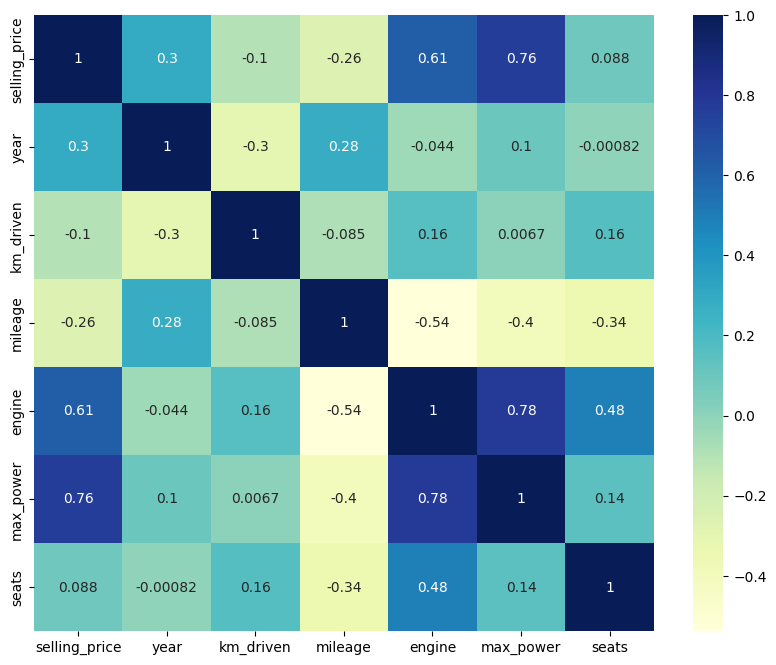

In [ ]:
plt.figure(figsize=(10,8))
numerical_df = df.select_dtypes(include=np.number)   #this step was to only include numerical variables in the heatmap
sns.heatmap(numerical_df.corr(), cmap="YlGnBu", annot=True)



We infer the following correlations:


*   Engine and max_power has the highest correlation among the given attributes.
*   Also max_power and selling price has high positive correlation, which makes sense.



We can also plot the scatter graph of selling_price (which is the ultimate target of the project) with each variables. This can be done using the pairplot in seaborn library.

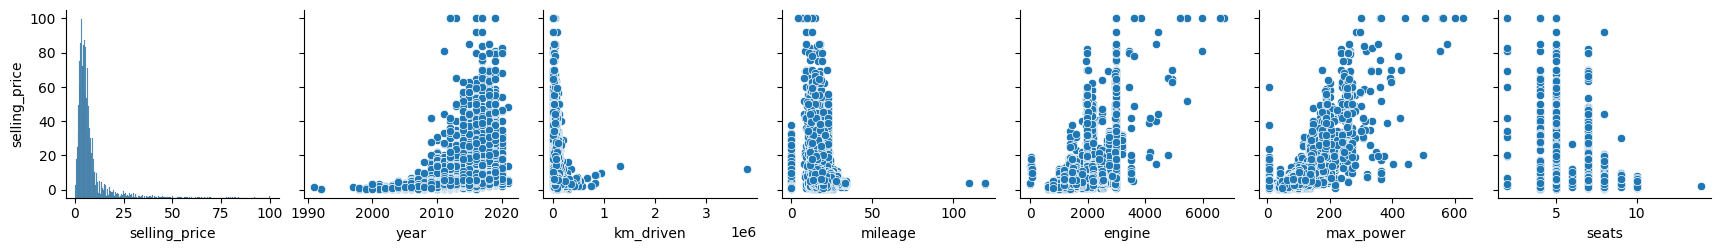

In [ ]:
sns.pairplot(df,y_vars='selling_price')



*   selling_price and engine; selling_price and max_power shows higher positive correlation among others. (More engine displc or higher max power, selling price increases)
*   Year and price have a positive correlation(closer the year to 2020, more the selling price)


 **An interesting revelation over selling price and mileage.**

 It is observed that though mileage over 100 is recorded, still the selling price is lower as compared to the overall data.

 It was previously clarified that mileage over 35 (110 and 120) were the ranges per charge of EVs. So it may be concluded that EVs even after having larger range from that of ICE cars, their selling price are less when it comes to pre-owned EVs. **Therefore pre-owned EVs may be seen to have depreciating value cars**.






In [ ]:
df['seats'].value_counts(normalize=True)    #normalize=true gets the percentage of all the subsets of a particular variable
#getting the seats wise percentage over total cars in the dataframe

,proportion
seats,
5.0,0.837123
7.0,0.115902
8.0,0.022237
4.0,0.011440
6.0,0.007293
9.0,0.003432
10.0,0.001502
2.0,0.001001
14.0,0.000072


In [ ]:
df[df['seats']==2.0].full_name


,full_name
392,Porsche Boxster S
1082,Mahindra Ingenio CRDe
2483,BMW Z4 M40i
2919,BMW Z4 2009-2013 35i
3029,Porsche Cayman S
3591,DC Avanti 2.0 L
3968,Lamborghini Gallardo Spyder
4228,Audi R8 4.2 FSI Quattro R Tronic
5570,Porsche Boxster S tiptronic
5644,Mahindra Bolero Pik-Up FB 1.7T


We can infer that the market of 5 seater cars(hatchbacks, sub-compact and compact suvs, sedans) are more than 7 seaters or above.

While 2 seaters mostly being high end luxury super cars, exceptions being a couple of Mahindra cars.

# Categorical Data

We can see that the full_name variable contains both the brand and the model of the car. We can extract those and make new features, seperate for brand and models.

In [ ]:
df['Brand'] = df.full_name.apply(lambda x: x.split()[0])
df['Model'] = df.full_name.apply(lambda x: ' '.join(x.split()[1:]))
df = df.drop('full_name', axis=1)
df.head()

,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,Brand,Model
0,2.85,2007.0,Individual,110000,Petrol,Manual,15.00,1586.0,104.68,5.0,Maruti,SX4 Zxi BSIII
1,4.70,2012.0,Dealer,70000,Diesel,Manual,21.90,1396.0,88.76,5.0,Hyundai,i20 Sportz 1.4 CRDi
2,5.25,2015.0,Individual,70000,Diesel,Manual,25.20,1248.0,74.00,5.0,Maruti,Swift VDI BSIV
3,1.25,2005.0,Individual,90000,Petrol,Manual,13.00,1343.0,90.00,5.0,Honda,City 1.3 EXI
4,4.65,2015.0,Dealer,41000,Petrol,Manual,16.47,1198.0,74.00,5.0,Volkswagen,Polo 1.2 MPI Comfortline


We have split the full name into brands and their models. Now we can even search for a particular brand as shown below.

In [ ]:
df[df['Brand']=='Mercedes-Benz'].Model

,Model
57,E-Class Exclusive E 220d
97,M-Class ML 250 CDI
205,C-Class 220 CDI AT
358,E-Class E250 CDI Elegance
420,CLA 200 CDI Sport
...,...
13779,C-Class C 220 CDI Sport Edition
13792,E-Class E200 CGI Blue Efficiency
13943,CLS 300d
13951,GL-Class 350 CDI Blue Efficiency


Now we'll look at the categorical columns individually.

In [ ]:
df.describe(include=object)

,seller_type,fuel_type,transmission_type,Brand,Model
count,13986,13986,13986,13986,13986
unique,3,5,2,41,2923
top,Dealer,Petrol,Manual,Maruti,Alto 800 LXI
freq,8393,6870,11251,3979,143


We see that the highest selling pre owned car brand is Maruti, model being Alto 800.

In [ ]:
df['seller_type'].value_counts()

,count
seller_type,
Dealer,8393
Individual,5450
Trustmark Dealer,143


In [ ]:
df['fuel_type'].value_counts()

,count
fuel_type,
Petrol,6870
Diesel,6823
CNG,233
LPG,49
Electric,11


In [ ]:
df['transmission_type'].value_counts()

,count
transmission_type,
Manual,11251
Automatic,2735


**Can we say that selling price varies seperately in these groups?**

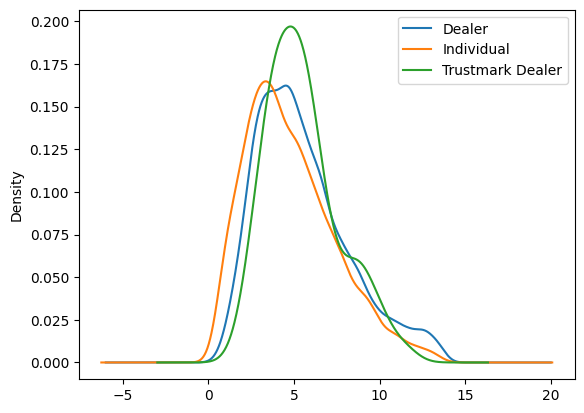

In [ ]:
df.loc[df.selling_price<=df.selling_price.quantile(0.9)].groupby('seller_type')['selling_price'].plot.density();
plt.legend();

We can infer from the above density plot that different seller type individually doesn't give a price distribution of a greater variable.

Hence one intuition may be that seller type seperately may not be a strong predictor for selling price.

We can loook into it further.

Now lets create box plots for all the features w.r.t. selling price to -


*   Detect outliers
*   Show data statistics


<ipython-input-90-d8585f9cf782>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='selling_price', palette='Set2', data=df)


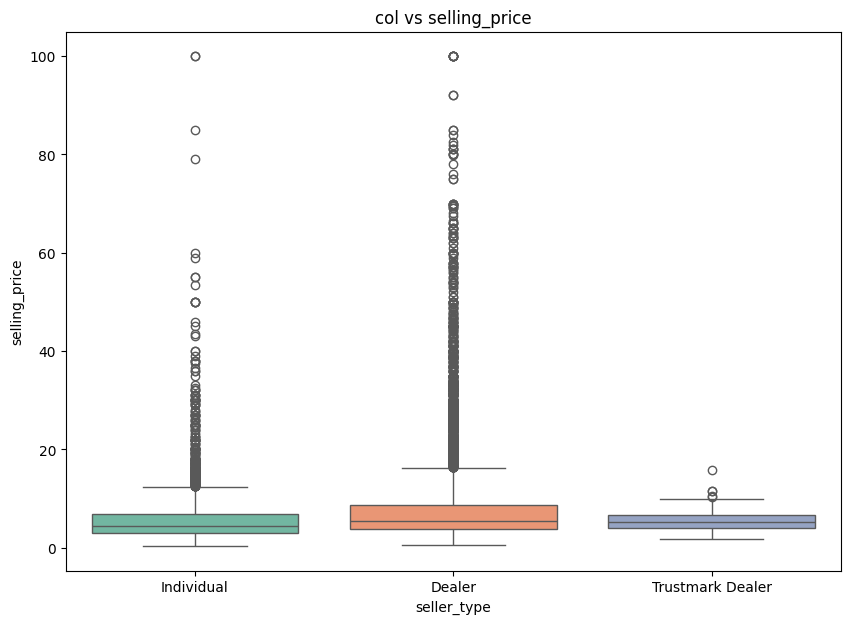

<ipython-input-90-d8585f9cf782>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='selling_price', palette='Set2', data=df)


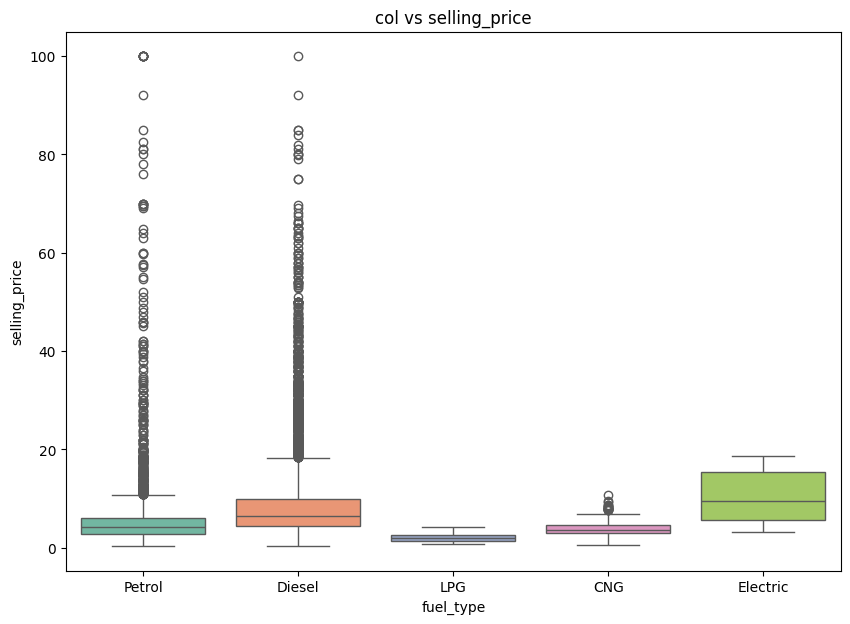

<ipython-input-90-d8585f9cf782>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='selling_price', palette='Set2', data=df)


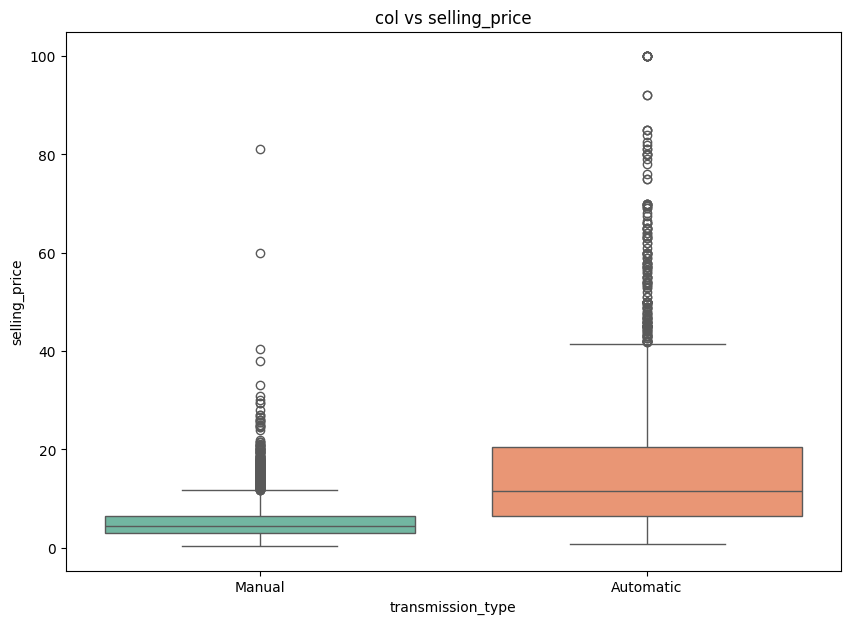

In [ ]:
for col in ['seller_type', 'fuel_type', 'transmission_type']:
    plt.figure(figsize=(10,7))
    sns.boxplot(x=col, y='selling_price', palette='Set2', data=df)
    plt.title('col vs selling_price')
    plt.show()

As we take inference from the above box plots, we see the following insights -


**Dealer_type vs Selling_price**



*   **Individual** Median selling price is low (around 2-4 lakhs) and the spread (Interquartile range IQR) is narrow, indicating less price variation.
*   A lot of outliers going upto 1CR. As we previously saturated those cars priced above 1CR to be placed in the same bin as 1CR, to keep data size intact.
*   Suggests individuals often sell low to mid range cars, most ranging between 2-4 lakhs, outliers (still a significant number) ranging between 10 to about 50 lakh, and only handful going above 50 lakhs.


*   **Dealer** median selling price a bit higher than that of individual (more than 5 lakhs)
*   The IQR is wider as compared to individual, indicating more varience in the selling price.
*   They also have a lot of high valued outliers (A lot more between the range of 15 to 60 lakhs and quite a few more above 70 lakhs as compared to individual)
*   Suggests that dealers have more varied range of cars and also a lot more high end models than individuals.


*   **Trustmark Dealers** median range slightly more than individuals but less than normal dealers.
*   Also narrow IQR which shows consistent pricing with less variability.
*   They have significantly less outliers, going only upto about 20 lakhs.
*   Since they are trustmarked dealers, this can indicate standardized and quality checked pre-owned cars.




*   We can see that most luxury and high end cars are sold by individuals or dealers.
*   Trust marked dealers sell more low to mid ranged cars at slightly higher price than individuals oweing to standardized quality checks prior selling, but thay have limited variability.


**Insights**

*   Trget individual sellers for cheaper option on cars, and slightly higher in terms of same car range, when targetting trustmark dealers.
*   Can target dealers if you're looking for diverse car options and if budget is not an issue.





**Fuel type vs Selling Price**



*   **Petrol cars** have reletively less median price (3 - 4 lakhs) and a wide IQR suggesting high variance in car prices.
*   A significant amount of outliers present ranging between about 10 lakh to 60 lakhs. Some amount of outliers also present above the range of 70 lakhs.



*   **Deisel cars** have higher median price than that of petrol counter-part, which is evident oweing to prices of same models of brand new deisel vehicles priced higher than that of brand new petrol models of a particular brand, possibly due to better fuel efficiency and more usage in heavier vehicles.  
*   A wider IQR than petrol indicates larger varience of pricing among deisel vehicles.
*   A significantly large number of outliers present ranging between 20 to 70 lakhs, and also quite a few high-end cars present above 75 lakhs.
*   **We notice that most outliers are present in petrol and deisel vehicles. CLearly stating the huge market for the two fuel types.**



*   **LPG cars** have the median price range abruptly below 5 lakhs and also a very narrow IQR, suggesting very less variance of price.
*   There are no outliers detected for LPG cars.
*   Indicates LPG cars are among cheapest and with the most consistant pricing in the dataset.



*   **CNG cars** have relatively lower median price than petrol and deisel vehicles, and a narrow IQR indicating a consistent pricing.
*   Very few outliers present till the range of about 10 to 15 lakhs.
*   Indicates CNG cars are in the affordable range with fewer models to choose from.



*   **Electric cars** have relatively higher median selling price than the rest of the fuel types, indicating prices are relatively higher than the rest of the fuel types.
*    A narrow IQR, taking into consideration limited number of EVs for sale.
*   No outliers present whatsoever, and indicating that all the 11 EVs in the data are below the range of 20 lakhs.


**Insights**


*   Premium car buyers can target more on petrol and deisel varients.
*   LPG/CNG can be cost efficient options for buyers on budget and with a specific fue type need.




**Transmission type vs Selling price**

*   **Manual transmission** shows low median selling price (about 3 - 4 lakhs), with a narrow IQR, indicating consistent and less variant pricing.
*   Significant number of outliers are present till the range of about 35 lakhs and only a handful present above the range of 40 lakhs.
* Suggests manual cars are more affordable.  



*   **Automatic transmission** shows a significantly higher median price than manual, along with a wider IQR, indicating a more varied range of cars having AMT.
*   A large number of high value outliers present, indicating most luxury and high end vehicles, or newer and more premium vehicles have automatic transmissions.



**Insights**
*   For budget conscious customers, manual transmission listings should be prioritized.
*   Automatic can be a default filter while marketing premium high end vehicles.

# Feature Engineering

In [ ]:
df.head()

,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,Brand,Model
0,2.85,2007.0,Individual,110000,Petrol,Manual,15.00,1586.0,104.68,5.0,Maruti,SX4 Zxi BSIII
1,4.70,2012.0,Dealer,70000,Diesel,Manual,21.90,1396.0,88.76,5.0,Hyundai,i20 Sportz 1.4 CRDi
2,5.25,2015.0,Individual,70000,Diesel,Manual,25.20,1248.0,74.00,5.0,Maruti,Swift VDI BSIV
3,1.25,2005.0,Individual,90000,Petrol,Manual,13.00,1343.0,90.00,5.0,Honda,City 1.3 EXI
4,4.65,2015.0,Dealer,41000,Petrol,Manual,16.47,1198.0,74.00,5.0,Volkswagen,Polo 1.2 MPI Comfortline


We can convert the year of the car given to the age of the car with the help of feature engineering, to simply understand the data a little easier.  

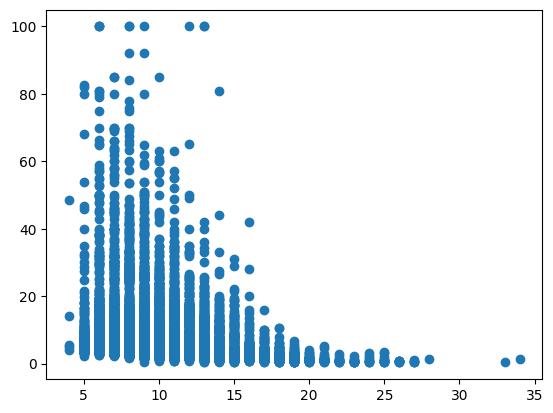

In [ ]:
current_year = 2025
age = current_year - df['year']
plt.scatter(age, df.selling_price)

This scatter plot clearly shows that -


*   The more a car ages, the selling price falls subsequently. Expected because cars depreciate over time.
*   Majority of high price listing are for those cars aged less than 5 - 10 years.
*   We see a significant drop in selling price for cars aging between 5 to 15 years. And after 15 years, the price levels off and stays below a certain threshhold.
*   Suggesting outdated and over-exhausted car parts, technologies in older vehicles, rising issue in availability of parts, issues in following of government set vehicle norms, are factors depreciating values in older cars.
*   Some high priced ouutliers even upto 15 years age suggest the cars being high end luxury vehicles or are premium segment cars maintained very well.
*   We see a high concentration of data between 5 to 10 years aged cars, with high density upto 60 lakhs. Indicates a prime spot for resale in the market, with people likely selling their cars around this age, buyers preferring these slightly used cars for better price with less compromise on the vehicle being completely outdated.






# Categorical Encoding

**Transmission Type (2 Categories - Manual/Automatic)**

In [ ]:
transmission_dummy = pd.get_dummies(df['transmission_type'], dtype=int)
df = pd.concat([df, transmission_dummy], axis=1)
df = df.drop('transmission_type', axis=1)
df.sample(frac=1).head(5)

,selling_price,year,seller_type,km_driven,fuel_type,mileage,engine,max_power,seats,Brand,Model,Automatic,Manual
1272,8.50,2016.0,Individual,54750,Petrol,15.40,1497.0,117.30,7.0,Honda,BRV i-VTEC V MT,0,1
6582,7.25,2017.0,Dealer,16334,Petrol,18.60,1197.0,81.83,5.0,Hyundai,i20 2015-2017 Sportz 1.2,0,1
2981,7.15,2016.0,Dealer,90000,Diesel,26.59,1248.0,74.00,5.0,Maruti,Swift Dzire AMT ZDI,1,0
2674,4.95,2014.0,Dealer,48100,Petrol,18.60,1197.0,81.83,5.0,Hyundai,i20 Magna 1.2,0,1
1406,3.90,2015.0,Dealer,28000,Petrol,18.90,998.0,67.10,5.0,Maruti,Wagon R VXI,0,1


**Fuel Type**

In [ ]:
fuel_type_dummy = pd.get_dummies(df['fuel_type'], dtype=int)
df = pd.concat([df, fuel_type_dummy], axis=1)
df = df.drop('fuel_type', axis=1)
df.sample(frac=1).head(5)

,selling_price,year,seller_type,km_driven,mileage,engine,max_power,seats,Brand,Model,Automatic,Manual,CNG,Diesel,Electric,LPG,Petrol
2106,3.99,2015.0,Dealer,59000,18.00,1198.0,86.70,5.0,Honda,Amaze VX i-Vtech,0,1,0,0,0,0,1
2551,5.50,2019.0,Dealer,15000,18.90,1197.0,81.86,5.0,Hyundai,Grand i10 1.2 Kappa Magna BSIV,0,1,0,0,0,0,1
8215,6.00,2016.0,Individual,100000,22.77,1498.0,98.59,5.0,Ford,Ecosport 2015-2021 1.5 TDCi Titanium BSIV,0,1,0,1,0,0,0
1519,14.50,2017.0,Dealer,25216,16.00,1368.0,160.00,5.0,Jeep,Compass 1.4 Limited Option Black,1,0,0,0,0,0,1
7602,1.45,2008.0,Dealer,75000,17.92,1086.0,62.10,5.0,Hyundai,Santro Xing GLS,0,1,0,0,0,0,1


Above we have encoded the transmission type and fuel type of each cars with the help of **one hot encoding** so that it is easier for us to show each individual features of the two columns in a heatmap and thus correlate them with the selling price.

Next we will encode the brands, to see which brand have correspondingly what trend of selling price. For that, we have to see first how many brands are there in total in the data.

In [ ]:
df['Brand'].nunique()

41

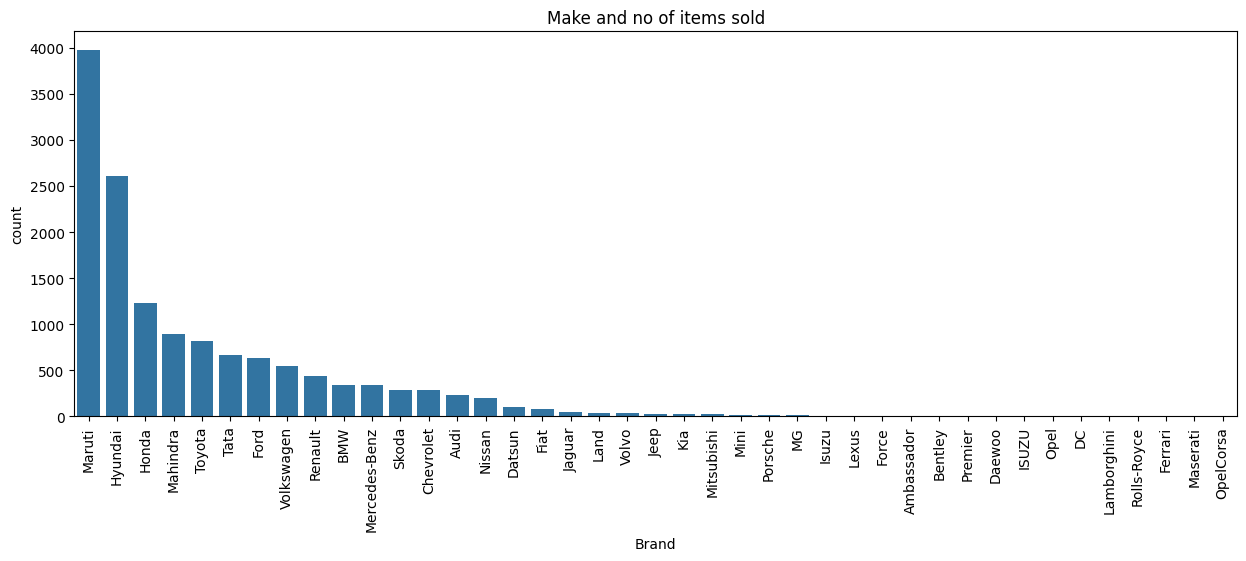

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='Brand', data=df, order = df['Brand'].value_counts().index)
plt.xticks(rotation=90);
plt.title("Make and no of items sold")
plt.show()

We have a lot of brands, and encoding them individually will create way too many columns.

We can try **Target encoding** for this.

In [ ]:
encoded_brand = df.groupby('Brand')['selling_price'].transform('mean')

Above, we have converted our categorical variable (Brand) into numerical ones, by replacing each category with the mean of the target variable (selling price) for the category brand with the help of **Target encoding**.

In [ ]:
show_df = df[['Brand']].copy()
show_df['encoded_brand'] = encoded_brand
show_df = show_df.drop_duplicates()
print(len(show_df))
show_df.head()

41


,Brand,encoded_brand
0,Maruti,4.648484
1,Hyundai,5.344764
3,Honda,5.911203
4,Volkswagen,5.632862
5,Toyota,11.179478


Here we show the result of the target encoding performend in the previous step, by creating a seperate table (show_df) and displaying all the unique car brands and their calculated average selling price associated with the particular brand.

Now we can merge them all together in the same table df.

In [ ]:
def preprocess(df):
  df = df.loc[df.mileage !=0].copy()   #creating copy of df, keeping only the rows where mileage is not 0.
  outlier_threshold = df.selling_price.quantile(0.95)
  df.loc[df.selling_price>outlier_threshold, 'selling_price'] = outlier_threshold   #sets any price greater than the outlier threshold to the threshold value itself.
  df['age'] = pd.to_datetime('now', utc=True).date().year - df['year']   #setting age of the car (current year - year of manufacture as mentioned in df)
  df['full_name'] = df['full_name'].str.upper()   #converting all the text in full_name to upper case.
  df.drop(columns =['year'])   #dropping the 'year' column
  return df

def feature_engineering(df):
  df['Brand'] = df.full_name.apply(lambda x: x.split()[0])   #extracting first word from full_name and assigning it to new column 'Brand'
  df['Model'] = df.full_name.apply(lambda x: ' '.join(x.split()[1:]))   #extracting rest of the words from full_name and assigning it to new column 'Model'
  one_hot_encode_cols = ['seller_type', 'fuel_type', 'transmission_type']   #defining a list of categorical columns, to be converted to numerical format using one-hot encoding
  for col in one_hot_encode_cols:
    one_hot_encode = pd.get_dummies(df[col], dtype=int)   #for each column, getting the dummy numerical columns for each categorical variables
    df = pd.concat([df, one_hot_encode], axis=1)   #concating to the dataframe
  df.drop(columns = one_hot_encode_cols + ['full_name'], inplace=True)   #dropping all the categorical variables already encoded and also full_name variable
  df['Brand'] = df.groupby('Brand')['selling_price'].transform('median')   #performing target encoding for brand and replacing each brand with median selling price for that brand
  df['Model'] = df.groupby('Model')['selling_price'].transform('median')   #performing target encoding for model and replacing each models with median selling price for that model
  return df


In [ ]:
df = pd.read_csv('train-cars24-car-price.csv')
df = preprocess(df)
df = feature_engineering(df)
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,seats,age,Brand,Model,Dealer,Individual,Trustmark Dealer,CNG,Diesel,Electric,LPG,Petrol,Automatic,Manual
0,2.85,2007.0,110000,15.00,1586.0,104.68,5.0,18.0,4.4,2.250,0,1,0,0,0,0,0,1,0,1
1,4.70,2012.0,70000,21.90,1396.0,88.76,5.0,13.0,4.9,4.475,1,0,0,0,1,0,0,0,0,1
2,5.25,2015.0,70000,25.20,1248.0,74.00,5.0,10.0,4.4,4.960,0,1,0,0,1,0,0,0,0,1
3,1.25,2005.0,90000,13.00,1343.0,90.00,5.0,20.0,5.5,2.125,0,1,0,0,0,0,0,1,0,1
4,4.65,2015.0,41000,16.47,1198.0,74.00,5.0,10.0,5.2,5.070,1,0,0,0,0,0,0,1,0,1


In [ ]:
df.shape

(13868, 20)

Now as we have performed all the necessary adjustments, let us finally see the heatmap to see the correlations of all the variables as we have converted them into our needed numerical form.

<Axes: >

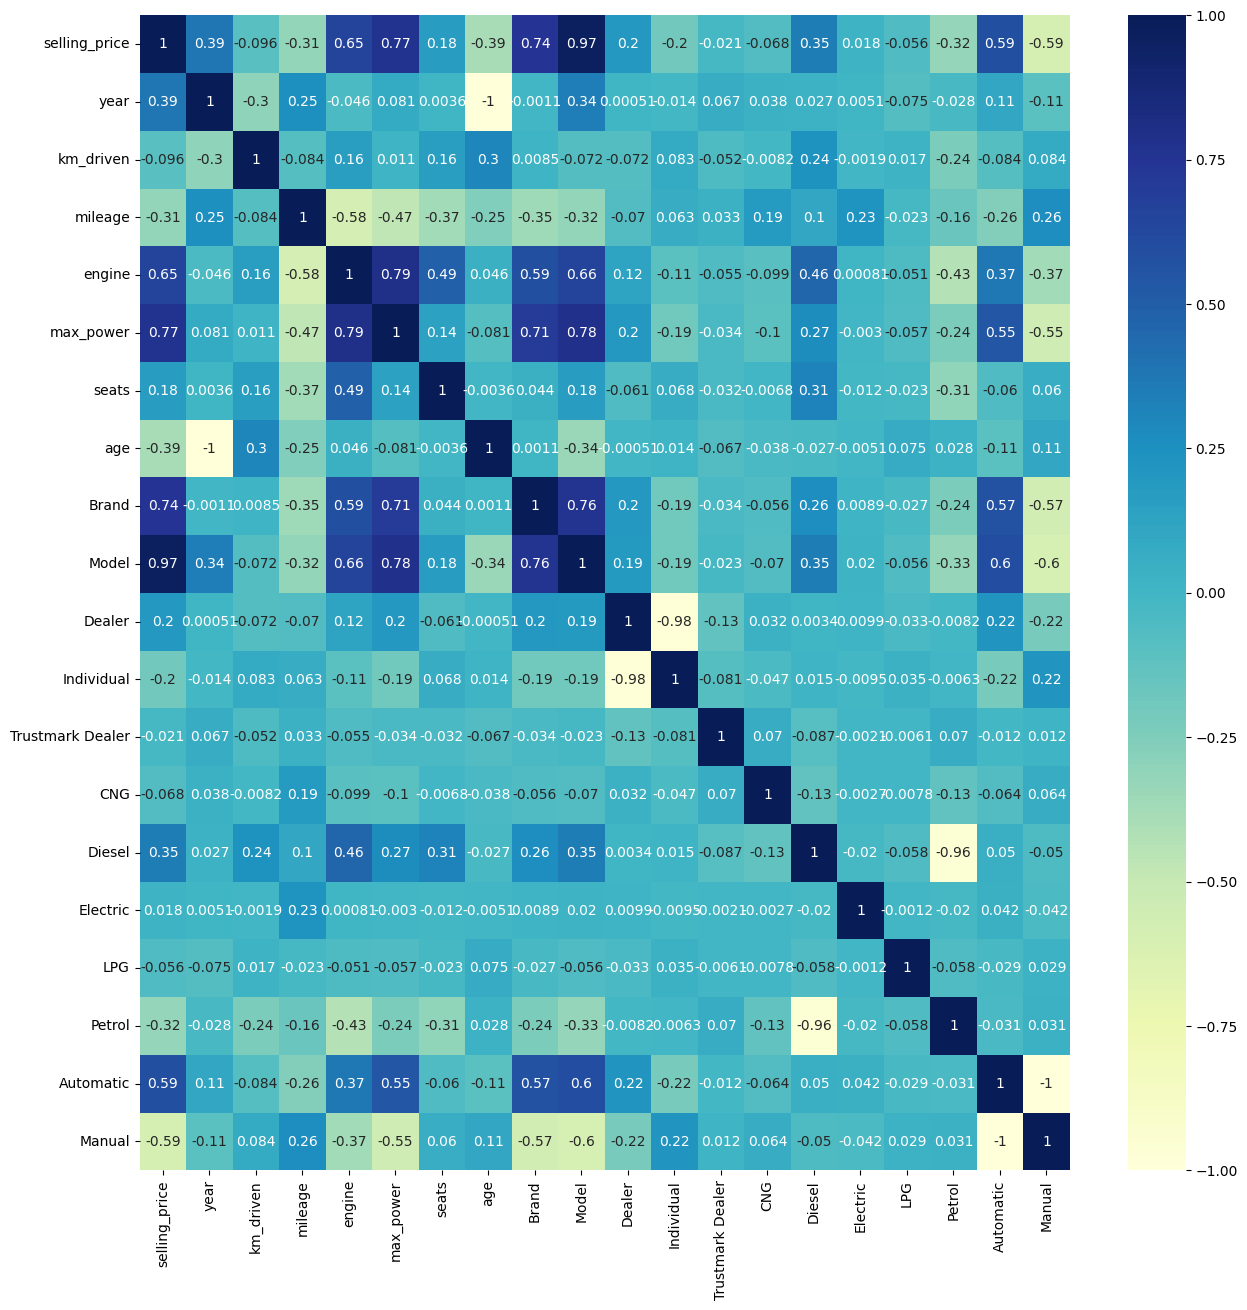

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True)

We can infer the following insights from the correlations between selling price and the newly encoded variables -


*   Brand is a strong correlator with price, indicating that the brand value of a car matters significantly while determining the selling price of a car of that particular brand.
*   Even stronger correlation with selling peice is with the model of the car, which definitely makes sense. (eg - An Indica model of the Tata brand will have significantly less selling price as compared to a New generation Safari of the same brand, which is a flagship suv of Tata currently, owing to premium up-to-date features, safety and comfort, stronger engine and power and overall quality make).
*   Seller type as seperate categories (dealer, individual and trustmark) doesn't make strong correlations with selling price.
*   Same as seller type, fuel type as seperate categories doesn't make strong correlations with selling price.  
*   Transmission type, on the other hand, have significantly stronger correlations as compared to seller or fuel type. While manual type having a negative correlation with selling price, automatic has a relatively higher positive correlation, as already referred earlier that most high end premium vehicle have automatic transmission whereas manuals are there in budget friendly cars mostly.


# Conclusion


Hereby, in this project, we performed an in-depth exploratory data analysis on a dataset from Cars24, focusing on factors influencing the selling price of used cars. Using Python libraries such as NumPy, Pandas, Matplotlib, and Seaborn, we extracted key insights that can help businesses and individuals make informed decisions about vehicle pricing.


**Key Business Takeaways:**


*   Engine displacement value and maximum power of a car significantly influences the resale value of the car; If engine cc and especially maximum power have a high value, then the resale value automatically goes up.
*   Cars with petrol or deisel engines have a relatively higher resale market than that of LPG, CNG or electric vehicles. Also, petrol and deisel cars overall have higher resale values than the rest, prices of deisel vehicles generally higher as compared to petrol.  
*   Automatic vs manual transmission cars have also shown a notable difference in their price range, manuals mostly fitted to affordable and budget friendly cars whereas automatic cars having a relatively high resale value.  
*   Car brands and models play a very significant role in deciding the resale value of the vehicle.
*   Age of the car too is a key indicator to it's resale value, more the age of the car, the resale value being dropped down correspondingly.




**Data Cleaning**

*   We have seen that there are no missing or null values present in the dataset.
*   Further, we have standardized inconsistent entries (standardizing the cars with prices higher than 1 Cr into a single bin), and also have removed outliers that could distort analysis (cleaning data of cars having mileage 0).
*   Categorical variables like those of brand and models, seller type, fuel type and transmission type have been visualized thus providing us important insights and helping us detect any sort of class imbalance or patterns.




**Visual Insights**
*   Correlation heatmaps revealed strong collinearity between selling price and factors like engine, maximum power, model and brand, and transmission type.
*   Histograms, boxplots and scatterplots helped identifying crucial elements like identifying outliers, estimate statistics and visualize relationships between selling price and other key variables.






